2023-12-25 01:03:47.409513: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 01:03:47.409575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 01:03:47.410410: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-25 01:03:47.418304: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-25 01:03:48.443348: W tensorflow/compiler/tf2

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


2023-12-25 01:03:52.756967: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 01:03:52.801617: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 01:03:52.801712: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 01:03:52.803034: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-25 01:03:52.803098: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

2023-12-25 01:03:58.892981: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.
2023-12-25 01:04:00.064512: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/200


2023-12-25 01:04:01.616876: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-12-25 01:04:01.832049: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2023-12-25 01:04:02.144217: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-25 01:04:03.388782: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-25 01:04:04.545121: I external/local_xla/xla/service/service.cc:168] XLA service 0x55e732470bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-25 01:04:04.545173: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 16

313/313 [==============================] - ETA: 0s - loss: 1.7341 - acc: 0.3564

2023-12-25 01:04:16.974292: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2023-12-25 01:04:17.413602: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 18s 37ms/step - loss: 1.7341 - acc: 0.3564 - val_loss: 1.4474 - val_acc: 0.4734
Epoch 2/200
  3/313 [..............................] - ETA: 9s - loss: 1.4044 - acc: 0.5130

/home/subhangmokkarala/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 27ms/step - loss: 1.2345 - acc: 0.5563 - val_loss: 1.1013 - val_acc: 0.6043
Epoch 3/200
313/313 [==============================] - 8s 26ms/step - loss: 1.0332 - acc: 0.6341 - val_loss: 0.9921 - val_acc: 0.6547
Epoch 4/200
313/313 [==============================] - 8s 27ms/step - loss: 0.9040 - acc: 0.6803 - val_loss: 0.8676 - val_acc: 0.6992
Epoch 5/200
313/313 [==============================] - 9s 28ms/step - loss: 0.8104 - acc: 0.7143 - val_loss: 0.8221 - val_acc: 0.7163
Epoch 6/200
313/313 [==============================] - 9s 27ms/step - loss: 0.7255 - acc: 0.7437 - val_loss: 0.7576 - val_acc: 0.7379
Epoch 7/200
313/313 [==============================] - 8s 26ms/step - loss: 0.6613 - acc: 0.7677 - val_loss: 0.8202 - val_acc: 0.7266
Epoch 8/200
313/313 [==============================] - 8s 26ms/step - loss: 0.6089 - acc: 0.7858 - val_loss: 0.7202 - val_acc: 0.7494
Epoch 9/200
313/313 [==============================] - 8s 26ms/step - loss

2023-12-25 01:16:21.413160: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 1.1530 - acc: 0.7899
loss: 1.152983546257019
acc: 0.789900004863739


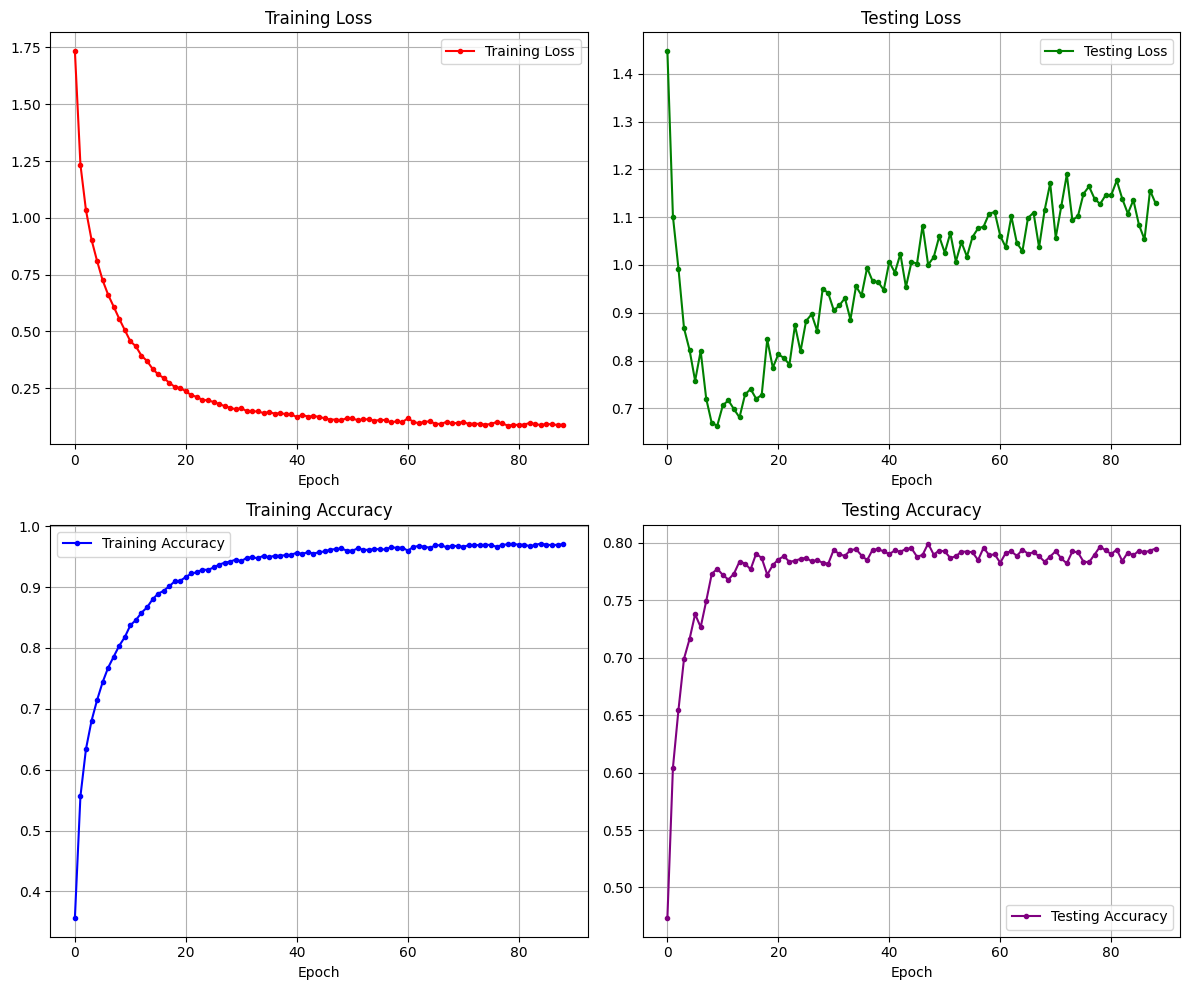

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the data
print(x_train.shape, y_train.shape) # (50000, 32, 32, 3) (50000, 1)
print(x_test.shape, y_test.shape)   # (10000, 32, 32, 3) (10000, 1)
print(x_train[0])
print(y_train[0])

# Data preprocessing
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Model configuration
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Model compilation
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Model summary
model.summary()

# Model fitting
es = EarlyStopping(monitor='loss', patience=10, mode='auto')
modelpath = '../data/modelcheckpoint/k46_cifar10_{epoch:02d}-{val_loss:.4f}.hdf5'
cp = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, mode='auto')
hist = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_split=0.2, callbacks=[es, cp])

# Model evaluation
loss = model.evaluate(x_test, y_test)
print('loss:', loss[0])
print('acc:', loss[1])

# Visualization
plt.figure(figsize=(12, 10))

# Training Loss
plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], marker='.', c='red', label='Training Loss')
plt.grid()
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.legend()

# Training Accuracy
plt.subplot(2, 2, 3)
plt.plot(hist.history['acc'], marker='.', c='blue', label='Training Accuracy')
plt.grid()
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Testing Loss
plt.subplot(2, 2, 2)
plt.plot(hist.history['val_loss'], marker='.', c='green', label='Testing Loss')
plt.grid()
plt.title('Testing Loss')
plt.xlabel('Epoch')
plt.legend()

# Testing Accuracy
plt.subplot(2, 2, 4)
plt.plot(hist.history['val_acc'], marker='.', c='purple', label='Testing Accuracy')
plt.grid()
plt.title('Testing Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


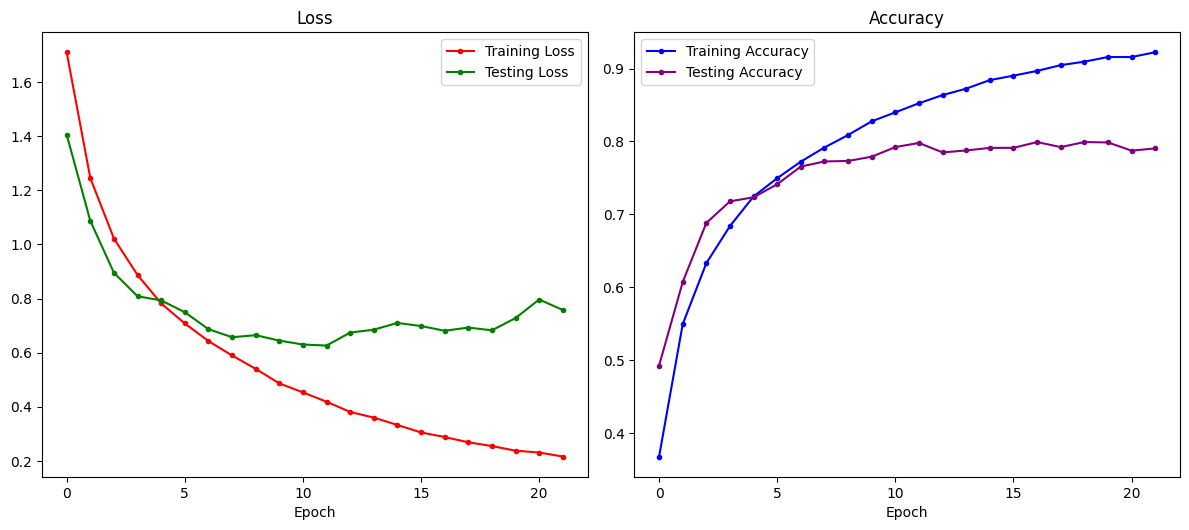

In [28]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))

# Training Loss
plt.subplot(2, 2, 1)
plt.plot(hist.history['loss'], marker='.', c='red', label='Training Loss')
plt.grid()
plt.plot(hist.history['val_loss'], marker='.', c='green', label='Testing Loss')
plt.grid()
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Training Accuracy
plt.subplot(2, 2, 2)
plt.plot(hist.history['acc'], marker='.', c='blue', label='Training Accuracy')
plt.grid()
plt.plot(hist.history['val_acc'], marker='.', c='purple', label='Testing Accuracy')
plt.grid()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()


# Testing Loss
#plt.subplot(2, 2, 2)

# Testing Accuracy
#plt.subplot(2, 2, 4)


plt.tight_layout()
plt.show()

In [2]:
#save model
model.save('cifar10.h5')

In [30]:
#import model and predict
from tensorflow.keras.models import load_model
model = load_model('cifar10.h5')

y_pred = model.predict(x_test)
print(y_pred)
print(y_pred.shape) #(10000, 10)

print(np.argmax(y_pred, axis=1))
print(y_test)


313/313 [==============================] - 1s 4ms/step
[[1.8079228e-10 6.4586274e-08 2.5723693e-08 ... 1.4167406e-07
  7.4953547e-08 6.2835985e-09]
 [3.1054915e-06 8.7180937e-04 2.5134187e-14 ... 2.8749389e-15
  9.9912411e-01 9.8669670e-07]
 [2.2698884e-04 1.1078658e-03 1.3191503e-06 ... 1.2013642e-07
  9.9854004e-01 6.1201681e-05]
 ...
 [5.6558837e-13 3.6407999e-10 1.9327094e-04 ... 3.4605338e-05
  4.4881158e-08 1.1883128e-10]
 [5.5265398e-04 9.9938190e-01 8.4180704e-07 ... 1.0624782e-07
  5.8543710e-06 5.6769550e-05]
 [8.1671849e-15 4.0933746e-16 2.7177169e-11 ... 9.9999988e-01
  1.1561292e-13 4.0638756e-16]]
(10000, 10)
[3 8 8 ... 5 1 7]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


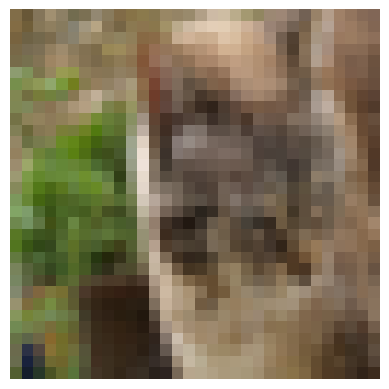

<Figure size 500x500 with 0 Axes>

1/1 [==============================] - 0s 21ms/step
[[2.2736272e-07 2.5763228e-07 3.3814993e-03 9.7188908e-01 1.0546425e-02
  8.8265873e-03 4.9112532e-03 3.3624054e-04 3.3412542e-07 1.0806333e-04]]
cat


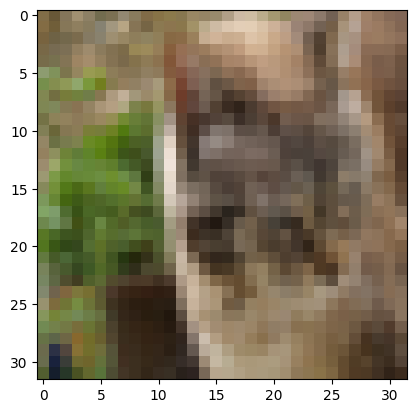

In [33]:
import matplotlib.pyplot as plt
#load a random image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
#load random image from dataset
# Load CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()

# Choose a random index
random_index = np.random.randint(0, len(x_train))

# Get the random image
random_image = x_train[random_index]

# Display the image
plt.imshow(random_image)
plt.axis('off')
plt.figure(figsize=(5, 5))
plt.show()

img = random_image
#img = load_img(r'download (2).jpeg', target_size=(32,32))
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')/255.

result = model.predict(img)
print(result)

#assign labels so we can print the result
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(labels[np.argmax(result)])
#shown the image with matplotlib
plt.imshow(img.reshape(32,32,3))
plt.show()




313/313 [==============================] - 1s 4ms/step
[[781  12  76  21  17   6   6  15  51  15]
 [  8 892   4  11   3   4   9   3  17  49]
 [ 28   1 708  81  63  27  54  25  11   2]
 [ 11   1  50 696  60  73  61  41   4   3]
 [  8   1  44  71 775  16  39  44   2   0]
 [  7   1  35 260  36 572  23  61   4   1]
 [  2   1  29  52  32   7 867   6   3   1]
 [ 11   2  18  38  41  25   4 855   2   4]
 [ 37  17  13  19   2   2   8   6 887   9]
 [ 25  64   6  25   5   2   6  15  20 832]]


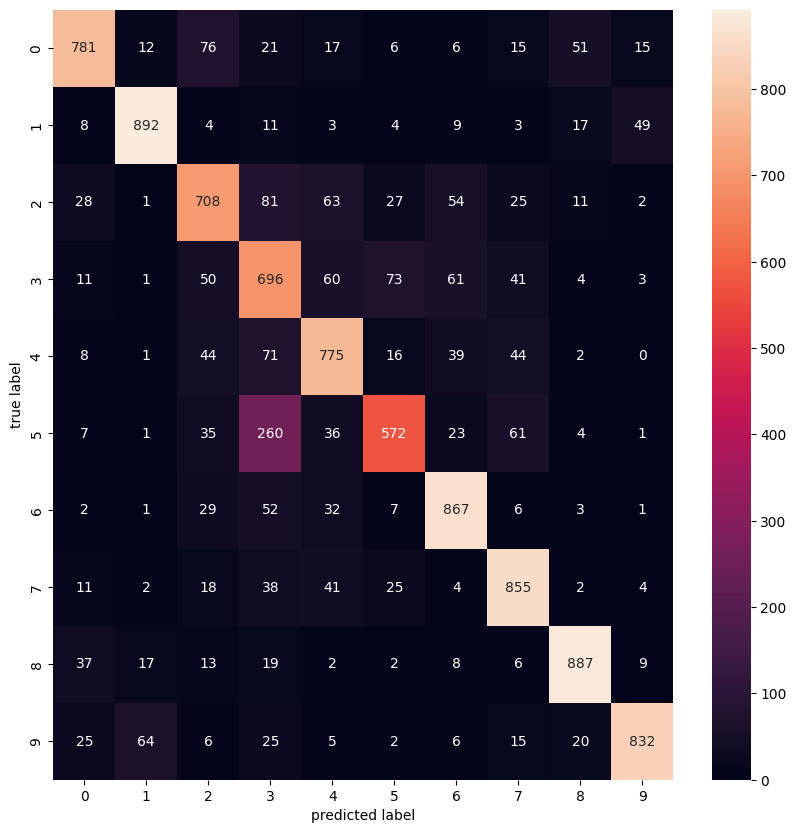

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1000
           1       0.90      0.89      0.90      1000
           2       0.72      0.71      0.71      1000
           3       0.55      0.70      0.61      1000
           4       0.75      0.78      0.76      1000
           5       0.78      0.57      0.66      1000
           6       0.81      0.87      0.83      1000
           7       0.80      0.85      0.83      1000
           8       0.89      0.89      0.89      1000
           9       0.91      0.83      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [32]:
#performance metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = y_test.reshape(-1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

print(classification_report(y_test, y_pred))